## Assignment 3: $k$ Nearest Neighbor

**Do two questions.**

`! git clone https://github.com/DS3001/knn`

In [1]:
! git clone http://github.com/pwy7fv/knn

Cloning into 'knn'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 82 (delta 31), reused 35 (delta 16), pack-reused 23 (from 1)
Receiving objects: 100% (82/82), 15.30 MiB | 11.50 MiB/s, done.
Resolving deltas: 100% (32/32), done.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Q0.

1. What is the difference between regression and classification?
2. What is a confusion table? What does it help us understand about a model's performance?
3. What does the SSE quantify about a particular model?
4. What are overfitting and underfitting?
5. Why does splitting the data into training and testing sets, and choosing
 by evaluating accuracy or SSE on the test set, improve model performance?
6. With classification, we can report a class label as a prediction or a probability distribution over class labels. Please explain the strengths and weaknesses of each approach.

1. The difference between regressiona and classification is what they are predicting. Regression predicts numeric outcomes, while classification predicts categorical ones.

2. A confusion table is a table that categorizes the predicted outcomes as either true negative, true positive, false negative, or false negative. It shows how close the predicted outcomes are to the actual outcomes and measures the accuracy of the predictions.

3. The SSE is the squared distance or difference between the actual values and the predicted ones. It adds all the squared differences of the actual value and predicted values, and the bigger the number the less close the predicted values are to the values of the actual outcome.

4. Overfitting happens when the model is too complex and too suited for the training set data that it has a hard time adjusting to the other dataset. So the graph would have a lot of curves and look overall unhinged. While an underfitting is when the model is too simple and gives a graph that does not show enough of the nuances or patterns and just a straight line without much information.

5. Only testing the data on the data it was trained on does not answer if it will work well on new data. By using testing data, data that the model is unfamiliar with, then you will see how well it will work in practice as well.

6. If a class label is reported as a prediction it is predicting one class lable over another os like "rain" or "sun." This kind oc classifcation can be good becasue it is easy to read and interpret, but can also miss on nuances in the data. While a proabality distribtion over the class ables does catch the nuances by giving the chances of probability with the class label. But with this way, it can be more difficult to read and understand.

**Q1.**  This question is a case study for k
 nearest neighbor regression, using the USA_cars_datasets.csv data.

This question is a case study for $k$ nearest neighbor The target variable `y` is `price` and the features are `year` and `mileage`.

1. Load the `./data/USA_cars_datasets.csv`. Keep the following variables and drop the rest: `price`, `year`, `mileage`. Are there any `NA`'s to handle? Look at the head and dimensions of the data.
2. Maxmin normalize `year` and `mileage`.
3. Split the sample into ~80% for training and ~20% for evaluation.
4. Use the $k$NN algorithm and the training data to predict `price` using `year` and `mileage` for the test set for $k=3,10,25,50,100,300$. For each value of $k$, compute the mean squared error and print a scatterplot showing the test value plotted against the predicted value. What patterns do you notice as you increase $k$?
5. Determine the optimal $k$ for these data.
6. Describe what happened in the plots of predicted versus actual prices as $k$ varied, taking your answer into part 6 into account. (Hint: Use the words "underfitting" and "overfitting".)

**Q1**

In [8]:
df = pd.read_csv('knn/data/USA_cars_datasets.csv')
keep = ['price','year','mileage']
df = df.loc[:,keep]


In [15]:
missing = df.isnull().sum()
print(missing)
#No missing data!

price      0
year       0
mileage    0
dtype: int64


In [12]:
print(df.shape)
print(df.describe)
df.head()

(2499, 3)
<bound method NDFrame.describe of       price  year  mileage
0      6300  2008   274117
1      2899  2011   190552
2      5350  2018    39590
3     25000  2014    64146
4     27700  2018     6654
...     ...   ...      ...
2494   7800  2019    23609
2495   9200  2018    34553
2496   9200  2018    31594
2497   9200  2018    32557
2498   9200  2018    31371

[2499 rows x 3 columns]>


,price,year,mileage
0,6300,2008,274117
1,2899,2011,190552
2,5350,2018,39590
3,25000,2014,64146
4,27700,2018,6654


**Q2**

In [17]:
def maxmin(z):
  z = (z-min(z))/(max(z)-min(z))
  return(z)

df['year'] = maxmin(df['year'])
df['mileage'] = maxmin(df['mileage'])

df.head()

,price,year,mileage
0,6300,0.744681,0.269287
1,2899,0.808511,0.187194
2,5350,0.957447,0.038892
3,25000,0.872340,0.063016
4,27700,0.957447,0.006537


**Q3**

In [18]:
from sklearn.model_selection import train_test_split
y = df['price']
X = df.loc[:,['year','mileage']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=200)

**Q4**

In [29]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

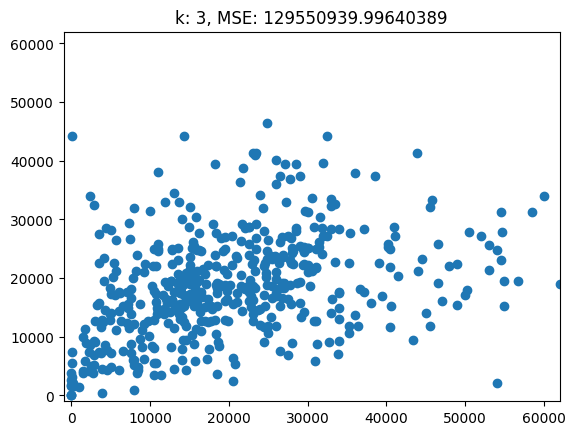

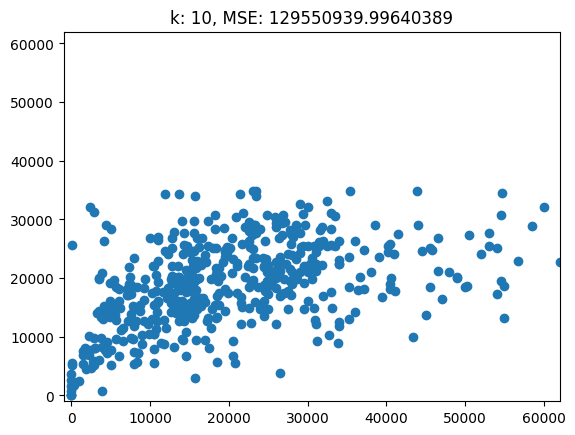

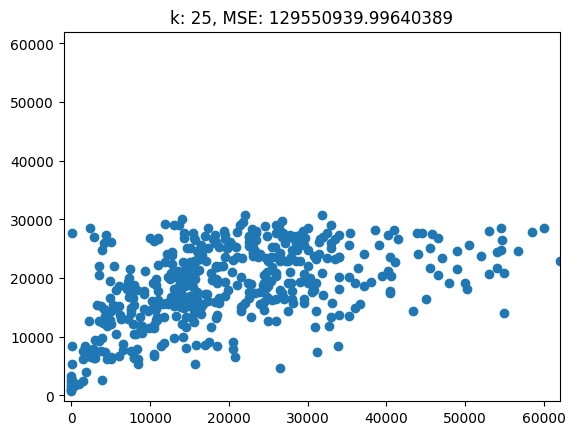

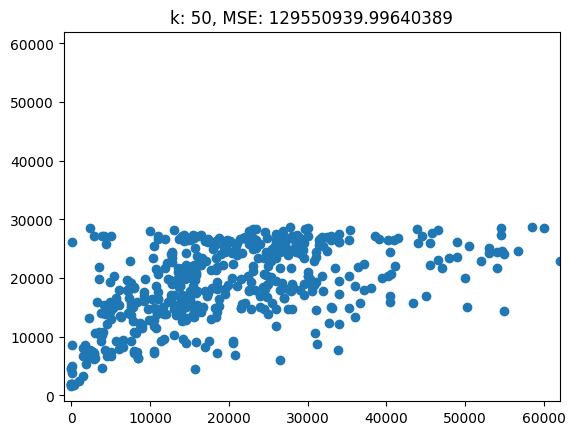

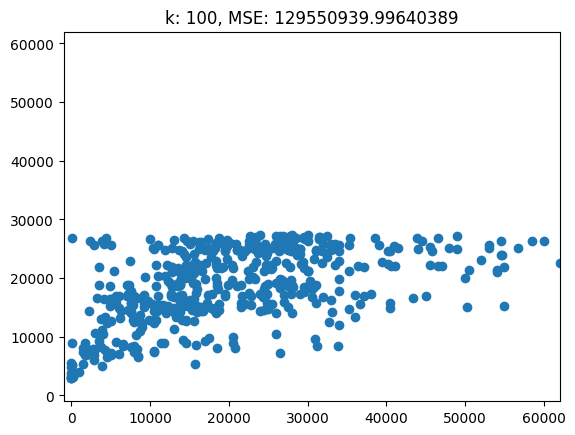

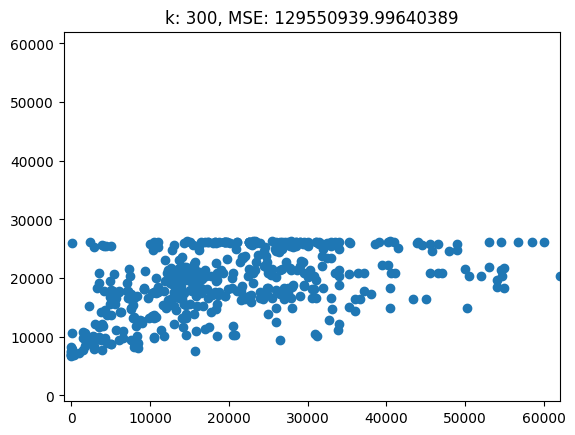

In [33]:
for k in [3,10,25,50,100,300]:
    model = KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_hat = model.predict(X_test)
    MSE = mean_squared_error(y_test, y_hat)

    plot, axes = plt.subplots()
    plt.scatter(y_test,y_hat)
    plt.title('k: '+str(k)+', MSE: '+str(mse))
    axes.set_ylim(-1000, 62000)
    axes.set_xlim(-1000, 62000)
    plt.show()
# As k increases the predicted values have less of a range.

**Q6**

[67]


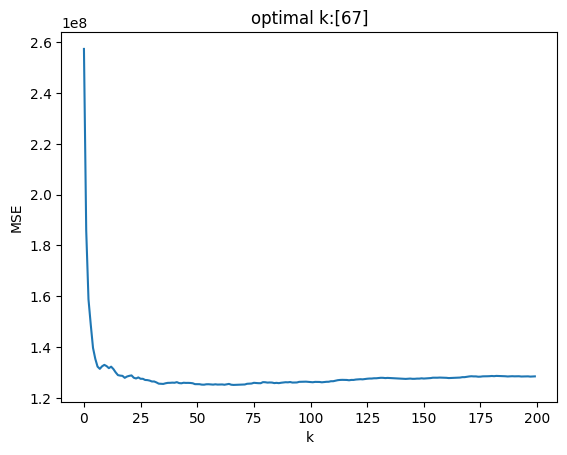

In [34]:
k_bar = 200
k_grid = np.arange(1,k_bar)
MSE = np.zeros(k_bar)

for k in range(k_bar):
    fitted_model = KNeighborsRegressor(n_neighbors=k+1).fit(X_train,y_train)
    y_hat = fitted_model.predict(X_test)
    MSE[k] = mean_squared_error(y_test, y_hat)

MSE_min = np.min(MSE)
min_index = np.where(MSE==MSE_min)
k_star = k_grid[min_index]
print(k_star)

plt.plot(np.arange(0,k_bar),MSE)
plt.xlabel("k")
plt.title("optimal k:"+str(k_star))
plt.ylabel('MSE')
plt.show()

Since the optimal K is 67, the graphs of the K's: 3,10, and 25 look the way they do because they are underfitting. The most effective amount of neart neigthbors are 67 and those graphs do not have enough, thus they are underfitting. The opposite can be said for the 300 K, it is overfitting because it uses too many nearset neighbors. While 100 maybe overfits a little it is still mch better than 300 and 50 is probably the best-fitted graph because it is closest to the optimal k.

Q2. This is a case study on k
 nearest neighbor classification, using the animals.csv data.

The data consist of a label, class, taking integer values 1 to 7, the name of the species, animal, and 16 characteristics of the animal, including hair, feathers, milk, eggs, airborne, and so on.

1. Load the data. For each of the seven class labels, print the values in the class and get a sense of what is included in that group. Perform some other EDA: How big are the classes? How much variation is there in each of the features/covariates? Which variables do you think will best predict which class?
2. Split the data 50/50 into training and test/validation sets. (The smaller the data are, the more equal the split should be, in my experience: Otherwise, all of the members of one class end up in the training or test data, and the model falls apart.)
3. Using all of the variables, build a
k-NN classifier. Explain how you select k
4. Print a confusion table for the optimal model, comparing predicted and actual class label on the test set. How accurate it is? Can you interpret why mistakes are made across groups?
5. Use only milk, aquatic, and airborne to train a new
k-NN classifier. Print your confusion table. Mine does not predict all of the classes, only a subset of them. To see the underlying probabilities, use model.predict_proba(X_test.values) to predict probabilities rather than labels for your X_test test data for your fitted model. Are all of the classes represented? Explain your results.

**Q5.** This question is a case study for $k$ nearest neighbor, using the heart_failure_clinical_records_dataset.csv data.



The data for the question include:

- age: age of the patient (years)
- anaemia: decrease of red blood cells or hemoglobin (boolean)
- high blood pressure: if the patient has hypertension (boolean)
- creatinine phosphokinase (CPK): level of the CPK enzyme in the blood (mcg/L)
- diabetes: if the patient has diabetes (boolean)
- ejection fraction: percentage of blood leaving the heart at each contraction (percentage)
- platelets: platelets in the blood (kiloplatelets/mL)
- sex: woman or man (binary)
- serum creatinine: level of serum creatinine in the blood (mg/dL)
- serum sodium: level of serum sodium in the blood (mEq/L)
- smoking: if the patient smokes or not (boolean)
- time: follow-up period (days)
- death event: if the patient deceased during the follow-up period (boolean)

1. Load the `./data/heart_failure_clinical_records_dataset.csv`. Are there any `NA`'s to handle? use `.drop()` to remove `time` from the dataframe.
2. Make a correlation matrix. What variables are strongly associated with a death event?
3. For the dummy variables `anaemia`, `diabetes`, `high_blood_pressure`, `sex`, and `smoking`, compute a summary table of `DEATH_EVENT` grouped by the variable. For which variables does a higher proportion of the population die when the variable takes the value 1 rather than 0?
4. On the basis of your answers from 2 and 3, build a matrix $X$ of the variables you think are most predictive of a death, and a variable $y$ equal to `DEATH_EVENT`.
5. Maxmin normalize all of the variables in `X`.
6. Split the sample into ~80% for training and ~20% for evaluation. (Try to use the same train/test split for the whole question, so that you're comparing apples to apples in the questions below.).
7. Determine the optimal number of neighbors for a $k$NN regression for the variables you selected.
8. OK, do steps 5 through 7 again, but use all of the variables (except `time`). Which model has a lower Sum of Squared Error? Which would you prefer to use in practice, if you had to predict `DEATH_EVENT`s? If you play with the selection of variables, how much does the SSE change for your fitted model on the test data? Are more variables always better? Explain your findings.